<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 7** | Exercício 2

Aluno [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 04 de fevereiro de 2024

---

#### Importando as bibliotecas

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix DEPRECATED
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [59]:
decisao = pd.read_csv('dados_cliente.csv', sep=',')
decisao.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [60]:
decisao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int64  
 9   sexo                                    16650 non-null  int64  
 10  posse_de_veiculo_Y                      16650 non-null  in

In [61]:
# Tratando dados duplicados
decisao.drop_duplicates(inplace = True)

In [62]:
decisao.shape

(6770, 29)

In [64]:
#Verifico id após a exclusão dos dados duplicados
decisao.tail()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
16644,1,34.857534,3.101370,1,1,1,0,1.0,1,0,...,1,0,0,1,0,1,0,0,0,0
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16649,0,33.936986,3.630137,1,0,1,1,2.0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [65]:
#Renumero id após a exclusão dos dados duplicados
decisao.reset_index(drop = True, inplace = True)
decisao.tail()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
6765,1,34.857534,3.101370,1,1,1,0,1.0,1,0,...,1,0,0,1,0,1,0,0,0,0
6766,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
6767,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
6768,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
6769,0,33.936986,3.630137,1,0,1,1,2.0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [66]:
# verifico dados faltantes --> Não tem dados ausentes
decisao.isna().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo                                      0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [68]:
# Conferindo se só tem Dados numéricos para fazer a arvore
decisao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   int64  
 9   sexo                                    6770 non-null   int64  
 10  posse_de_veiculo_Y                      6770 non-null   int6

In [69]:
decisao.shape

(6770, 29)

In [70]:
# Conferindo valores da coluna target
decisao.mau.unique()

array([0, 1], dtype=int64)

In [71]:
# Definindo o target
y = decisao['mau']

In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mau, dtype: int64

In [73]:
# Definindo as variáveis explicativas
X = decisao.drop('mau',axis=1)

In [74]:
X.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,46.224658,2.106849,1,1,1,1,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,29.230137,3.021918,1,0,0,0,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,27.482192,4.024658,1,0,1,0,2.0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [75]:
# Definindo a proporção de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [77]:
# Criando a arvore de decisão
clf = tree.DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

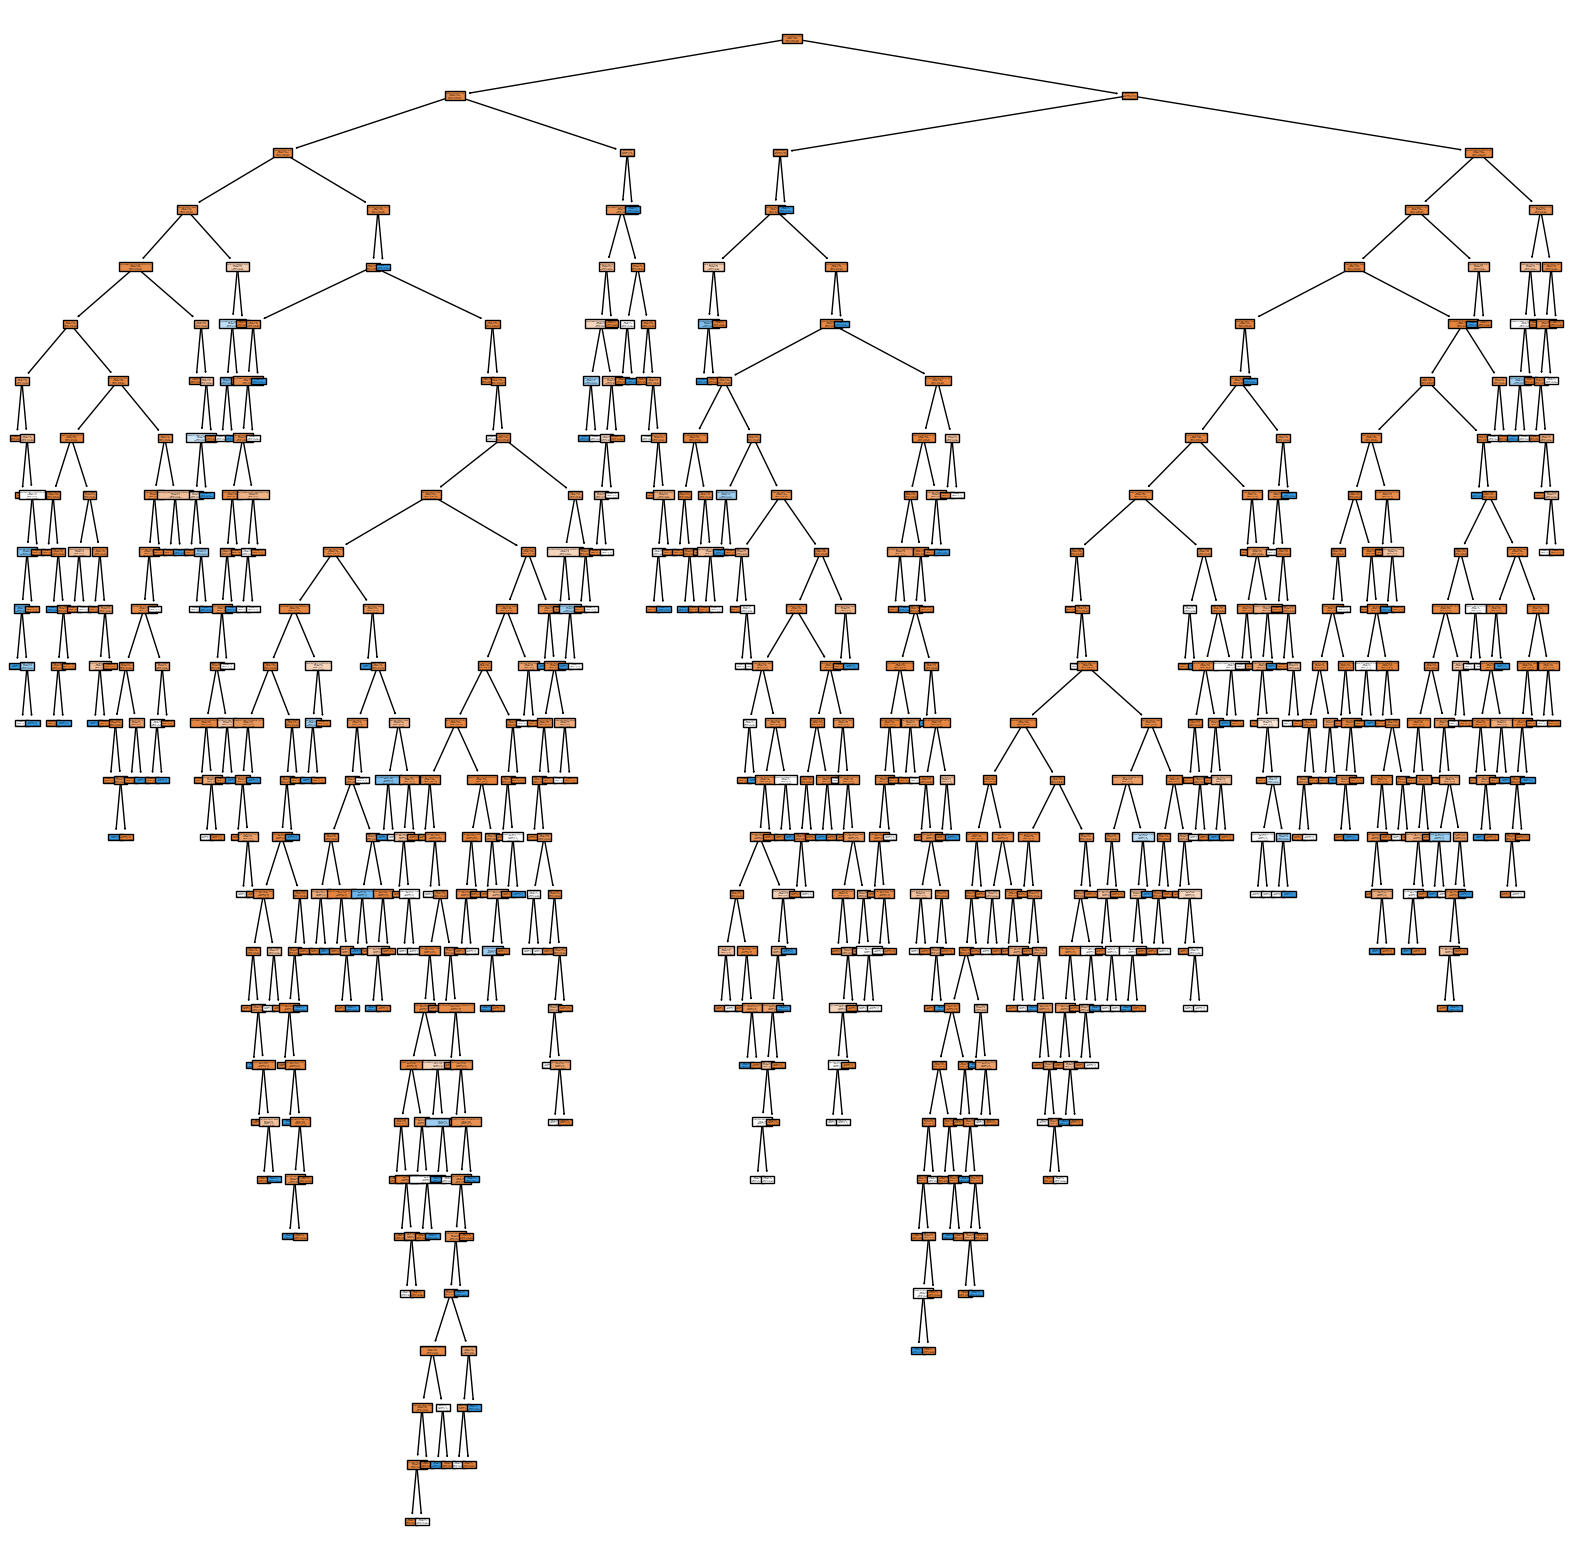

In [78]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns.tolist());

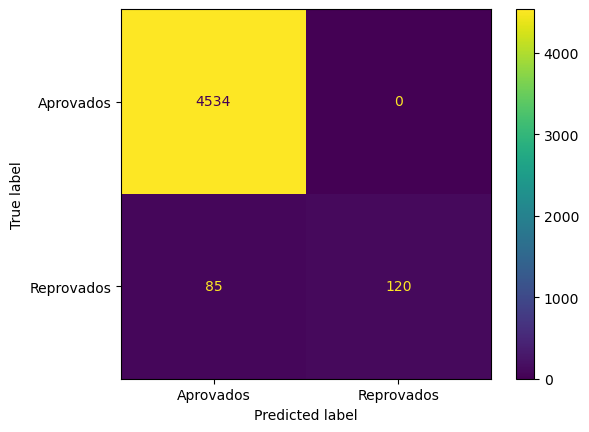

In [79]:
# Plotando a matrix de confusão, a tabela de verdade para o treino
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [80]:
# Calculando a acurácia do treino
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9820637265245833

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [81]:
# Colocando o modelo à prova, testando para as variáveis de teste
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test,y_test)

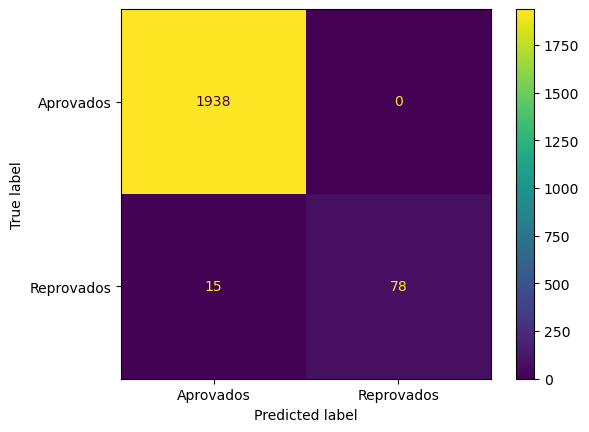

In [82]:
# Plotando a matriz confusão das variáveis de teste
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [83]:
# Acurácia da base de teste (0.98), próxima à acurácia da base de treinamento (0.979)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9926144756277696

In [84]:
# Treinando nova árvore de decisão utilizando os parametros da atividade
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)

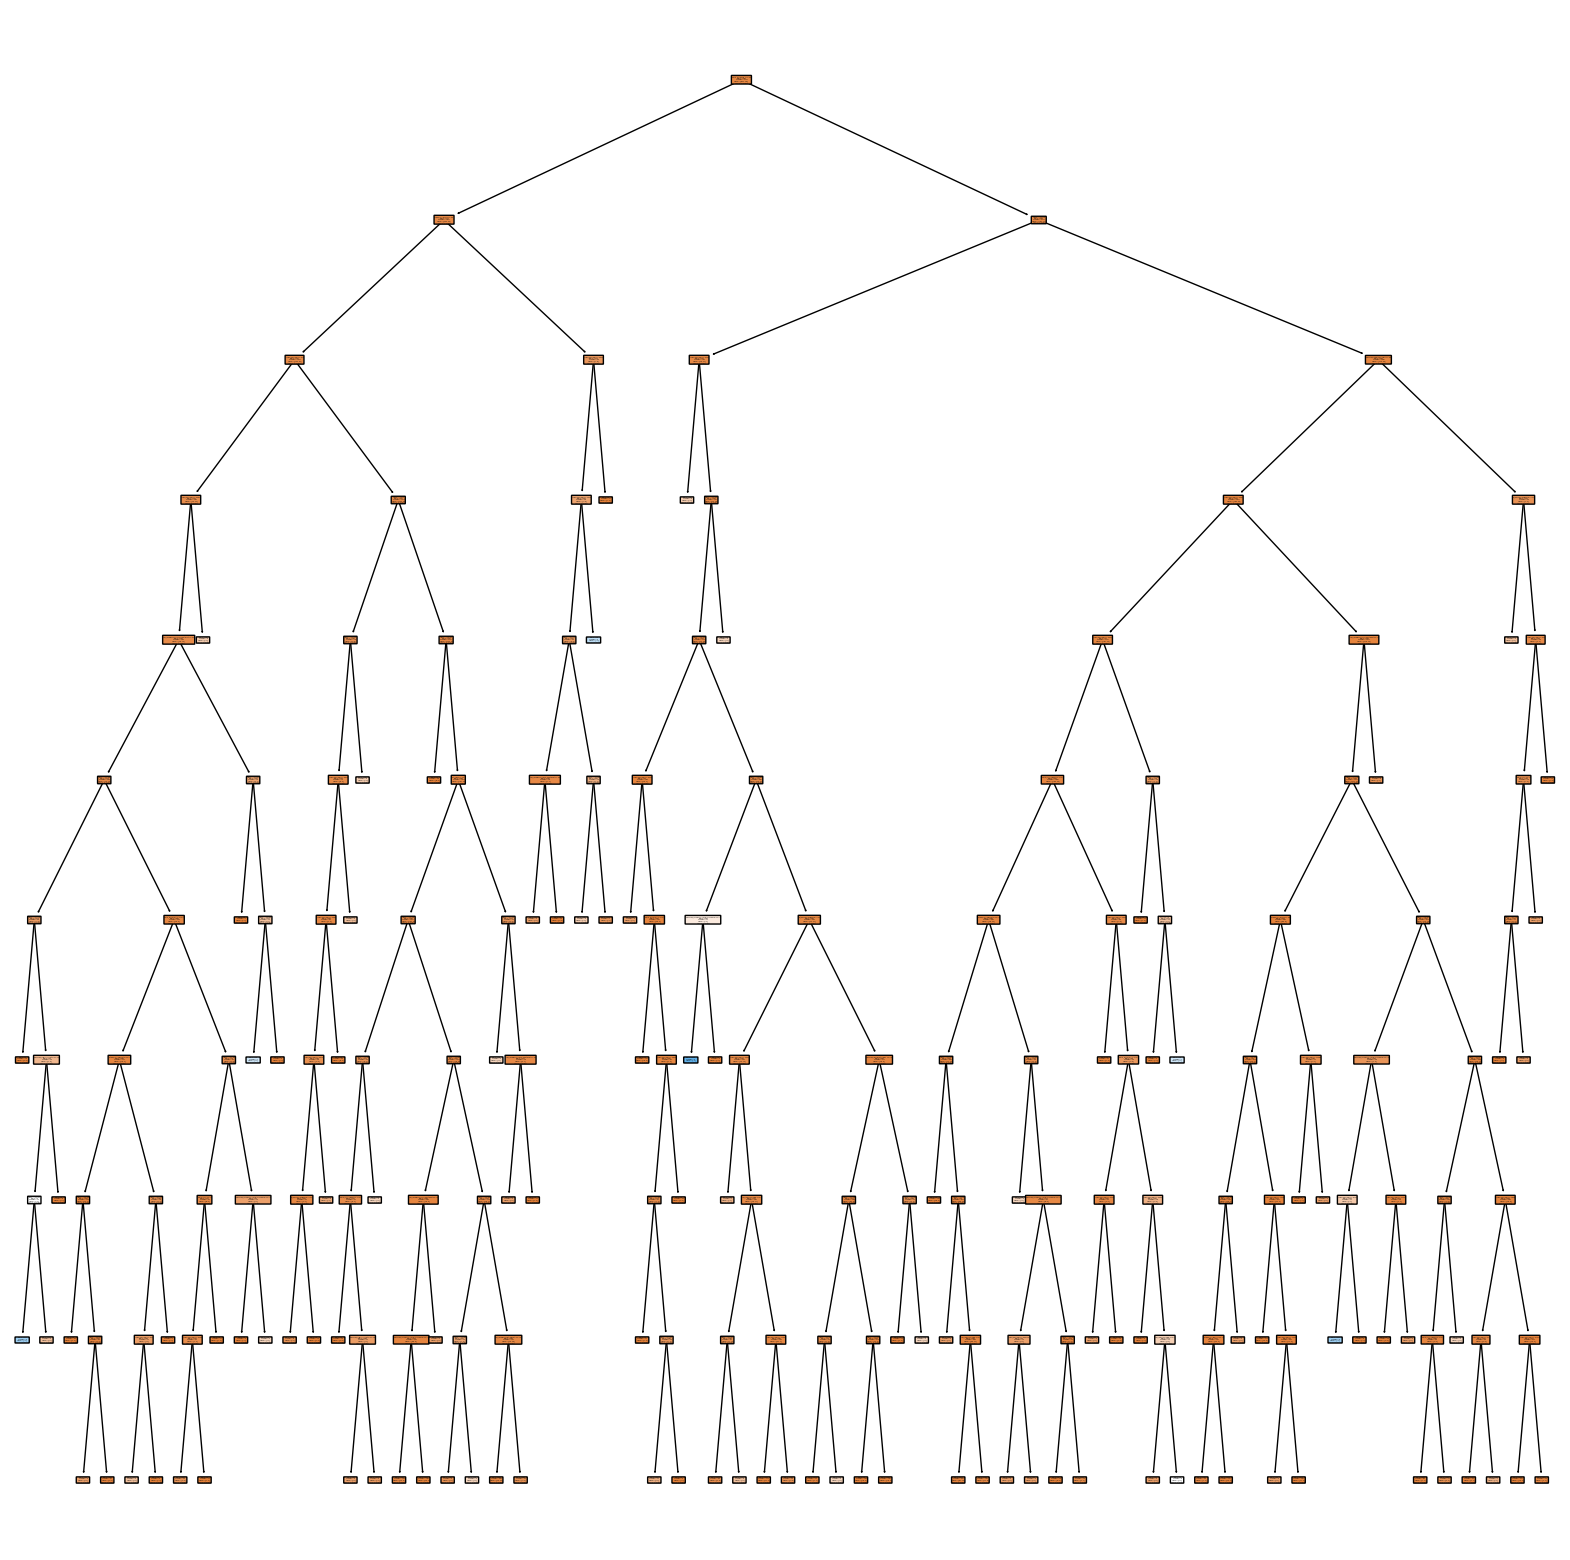

In [85]:
# Plotando a a matriz de classificação da árvore de decisão
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X.columns.tolist());

In [86]:
# Calculando a proporção de aprovados e reprovados na base de teste
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [87]:
# Bons
proporcao_aprovados*100

96.15952732644017

In [88]:
# Maus (menos de 1%)
proporcao_reprovados*100

3.8404726735598227

### DÚVIDA 1 - Por que não aceita "feature_names=X.columns" ?

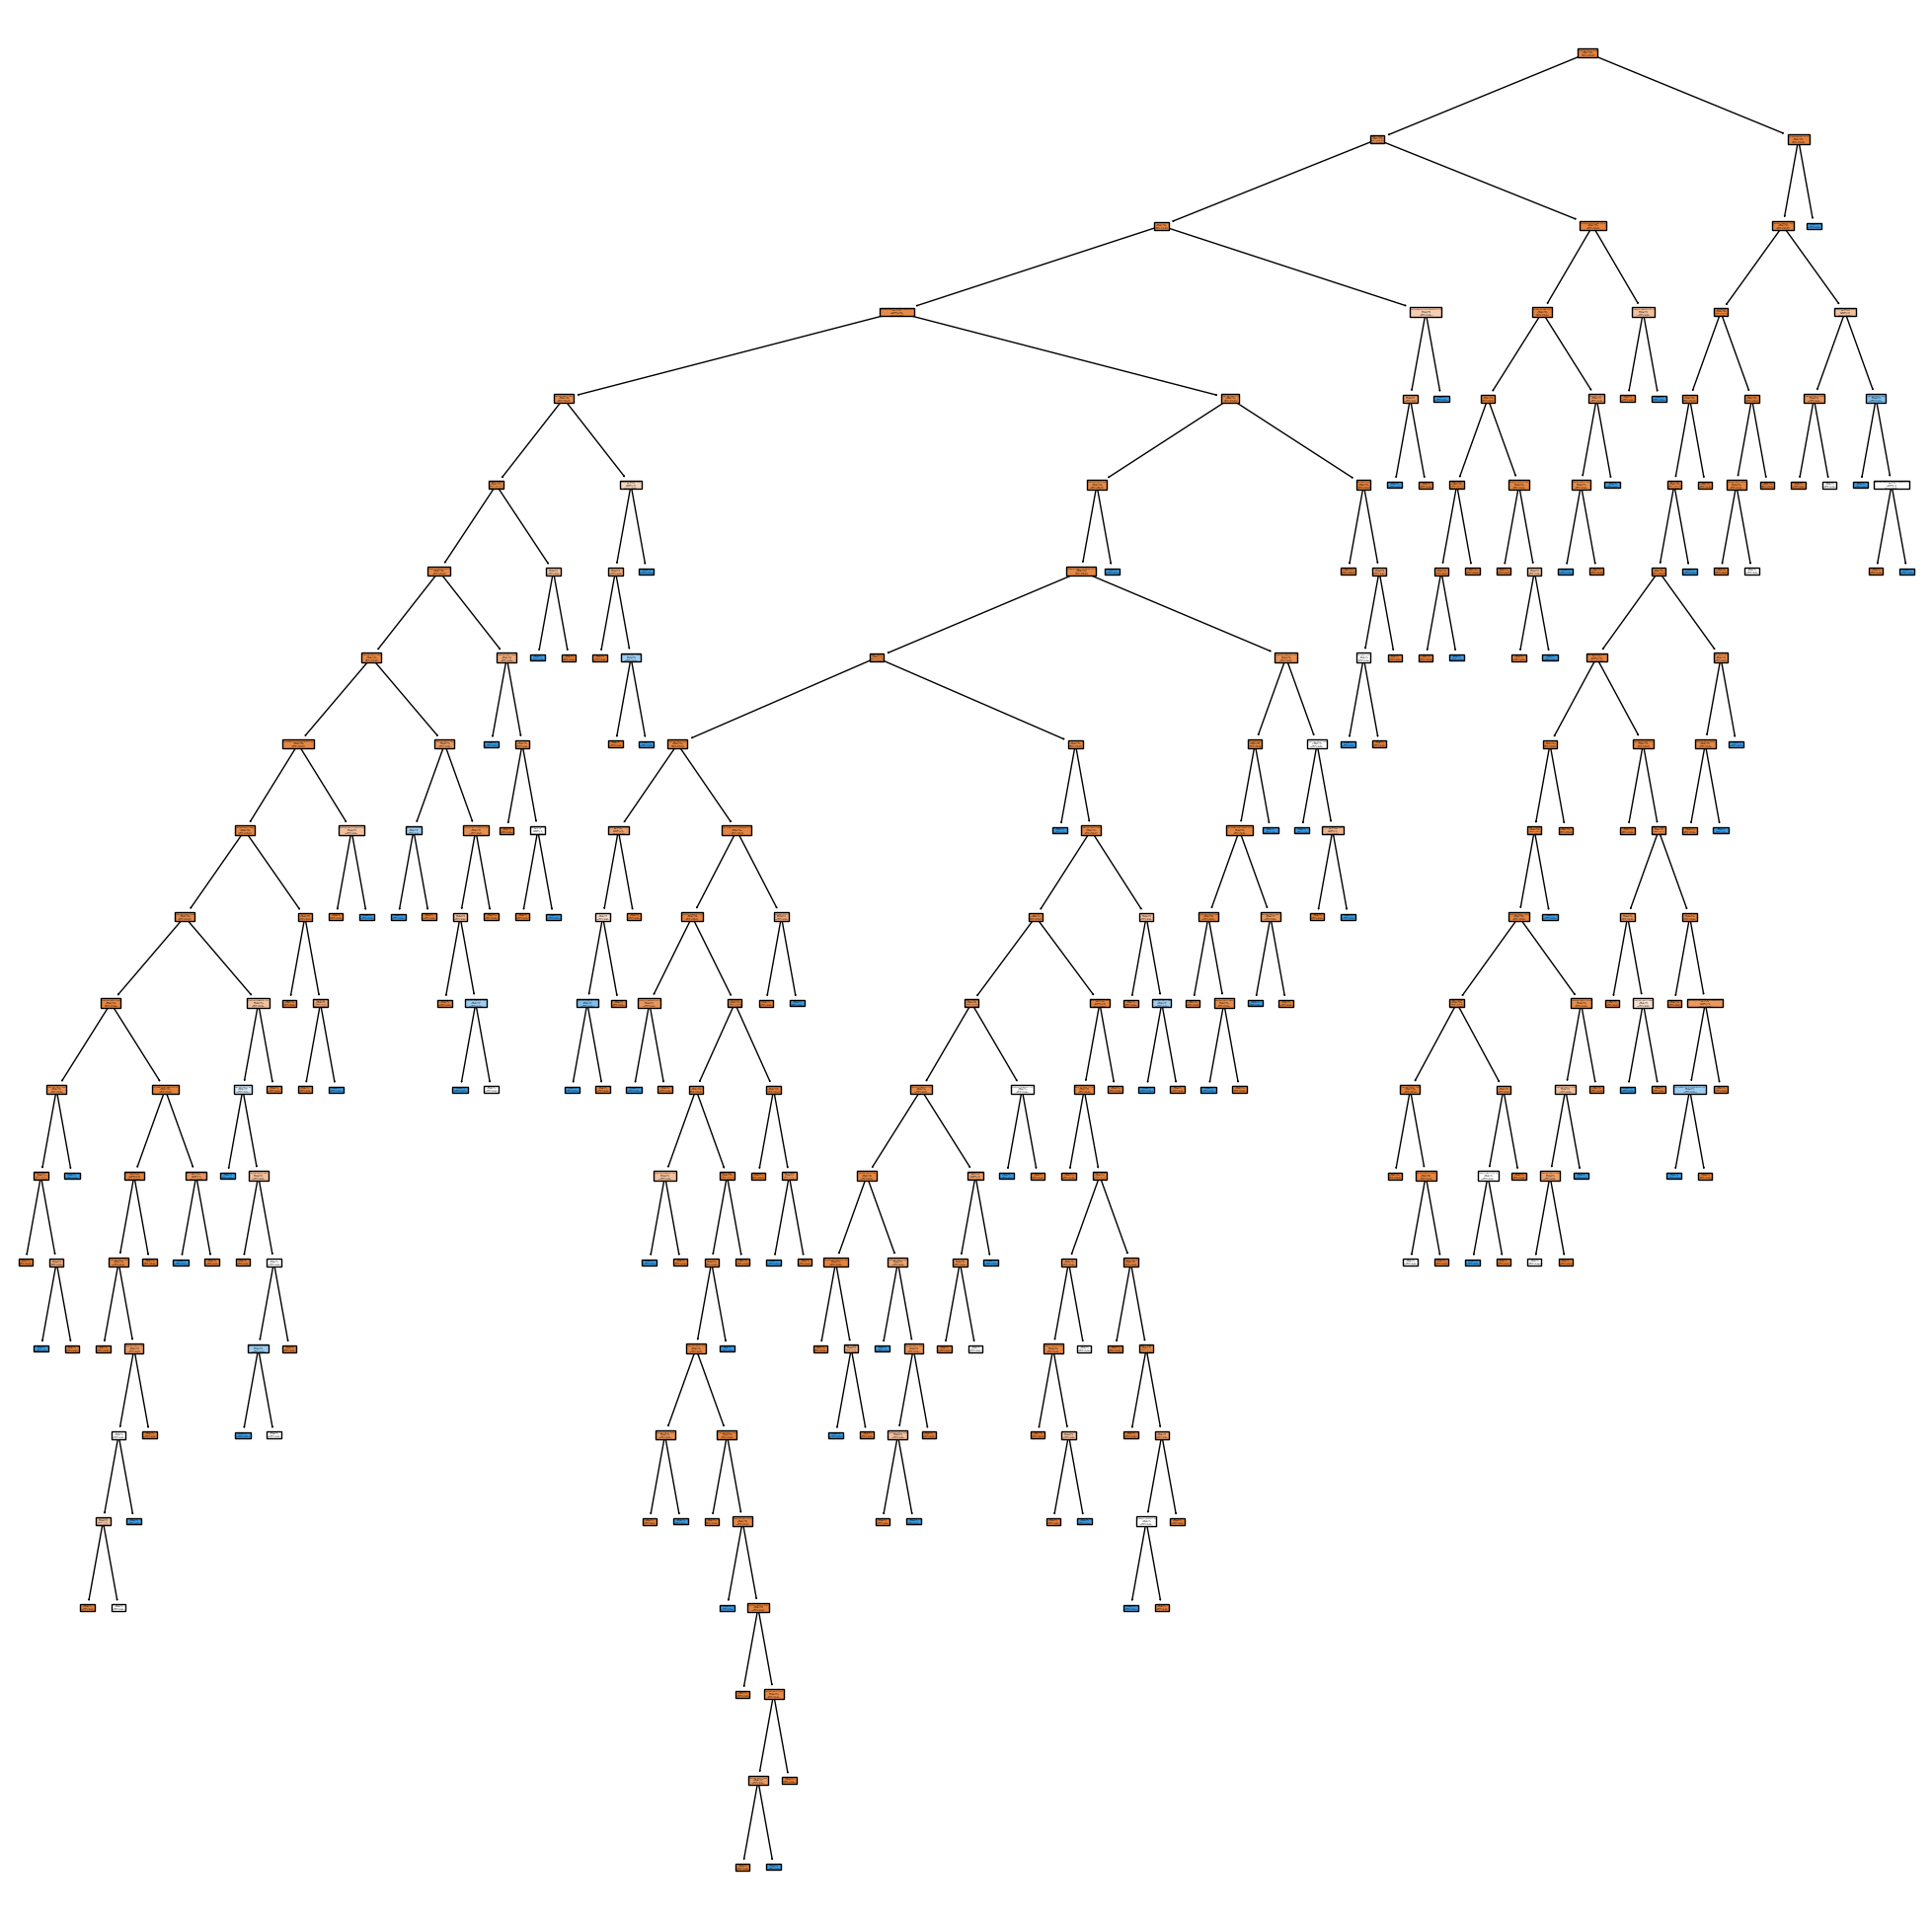

In [26]:
plt.figure(figsize=(25, 25))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados','Reprovados'],
          feature_names= X.columns.tolist());

# usando feature_names=X.columns); dá o erro InvalidParameterError: 
# The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index (['qtd_filhos', 'idade', 
# 'tempo_emprego', 'possui_celular', 'possui_fone_comercial', 'possui_fone', 'possui_email', 'qt_pessoas_residencia', 
# 'sexo', 'posse_de_veiculo_Y', 'posse_de_imovel_Y'],dtype='object') instead.
# <Figure size 2500x1000 with 0 Axes>

### DÚVIDA 2 - Por que  erro da imagem anexada na tarefa?